## Medici&oacute;n y An&aacute;lisis de Reacciones Emocionales a Trav&eacute;s de Estimulos Visuales

<style>
    .imagen-ajustada {
        width: 900px;
        height: 280px;
        border-radius: 20px;
    }
</style>

<img src="Emociones.jpg" alt="Una imagen" class="imagen-ajustada">

Las emociones son algo muy b&aacute;sico en el ser humano, sin embargo muchas veces no es necesario expresar la emoci&oacute;n por medio de palabras, sino que con el rostro se puede denotar lo que estas sintiendo. Basandonos en este concepto el proyecto fue planificado para ver si por medio de estimulos visuales, en este caso videos, se pueden obtener reacciones emocionales de acuerdo a lo que se le muestre.

Para el estudio se utilizaron 12 sujetos de prueba, en este caso fueron 8 hombres y 4 mujeres, con un rango de edad de 22 a 56 años con el fin de ver si generaba algun tipo de reaccion emocional por su parte.

El estudio consistia en mostrar 7 videos de 30 segundos conformados de la siguiente manera:
- Un video de relajacion, con el fin de que el sujeto este en calma.
- Un video donde una nina juega con su perro a que es veterinaria, con el fin de tratar de obtener una reaccion de felicidad o gracia. 
- Un video de relajacion, con el fin de que el sujeto vuelva a un estado neutral.
- Un video donde un hombre golpea a su mujer con un bebe en brazos, con el fin de tratar de obtener una reaccion de enojo, impotencia y rabia.
- Un video de relajacion, con el fin de que el sujeto vuelva a un estado neutral.
- Un video donde una mujer esta abrazando a su perro mientras proceden a dormirlo, con el fin de obtener una reaccion de tristeza.
- Finalmente, un video de relajacion con el fin de que el sujeto vuelva a un estado neutral.      

El fin de comenzar y terminar con un video de relajacion es para ver si hay algun cambio entre el estado inicial y final, como nos indican en la materia de analisis y diseno de experimentos en ciencias de la computacion, tenemos que tener un pre y un post de en el estudio.

## Librerias Importadas

In [43]:
import os
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
from pydub import AudioSegment
import subprocess
from moviepy.editor import VideoFileClip
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np

## Procesamiento de datos

Para poder comenzar con el tratamiento de los datos fue importante separar los videos de los audios, por lo cual se uso un script para separarlos en distintas carpetas. Despues de eso se trato de cortar los audios a una misma cantidad de tiempo como en el siguiente codigo.

In [21]:
# Ruta a la carpeta que contiene tus archivos de audio
carpeta_audios = './Audios/'

# Ruta a la carpeta donde deseas guardar los audios recortados
carpeta_destino = './AudiosRecortados/'

# Crear la carpeta de destino si no existe
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Iterar sobre cada archivo en la carpeta
for archivo in os.listdir(carpeta_audios):
    ruta_archivo = os.path.join(carpeta_audios, archivo)
    
    # Cargar el archivo de audio
    audio = AudioSegment.from_file(ruta_archivo)
    
    # Descartar los primeros 30 segundos del audio
    audio_recortado = audio[40000:]  # 30 segundos = 30,000 milisegundos
    
    # Guardar el audio recortado
    ruta_destino = os.path.join(carpeta_destino, archivo)
    audio_recortado.export(ruta_destino, format="wav")  # Cambia "wav" si necesitas otro formato

print("Recorte completado.")

Recorte completado.


Sin embargo, no se tomo en cuenta que no todos los audios duraban la misma cantidad de tiempo, asi como las personas hablaban mas o hablaban menos, por lo cual se opto por un script para cortar de forma personalizada cada audio y asi obtener de forma precisa los comentarios de los sujetos de prueba.

In [30]:
# Ruta al archivo de audio específico
ruta_audio = './Audios/SUJETO6_TRISTEZA.wav'

# Puntos de inicio y fin del segmento en milisegundos
# Por ejemplo, para comenzar en el segundo 20 y terminar en el segundo 60
inicio_ms = 30000  # Inicio a los 20 segundos
duracion_ms = 17000  # Duración de 40 segundos desde el punto de inicio

# Cargar el archivo de audio
audio = AudioSegment.from_file(ruta_audio)

# Recortar el segmento deseado
segmento_audio = audio[inicio_ms:inicio_ms+duracion_ms]

# Ruta para guardar el segmento recortado
ruta_destino = './AudiosRecortados/SUJETO6_TRISTEZA_R.wav'

# Guardar el segmento recortado
segmento_audio.export(ruta_destino, format="wav")

print("Segmento recortado y guardado.")


Segmento recortado y guardado.


Para el siguiente caso fue recortar los videos unicamente cuando se tiene la reaccion del sujeto con el video, por lo cual se utilizo un script para cortar los primeros segundos en base a la duracion del video.

In [45]:
# Define la ruta de la carpeta que contiene los videos originales
carpeta_videos = './Videos/'

# Define la ruta de la carpeta donde guardarás los videos recortados
carpeta_destino = './VideosRecortados/'

# Crea la carpeta de destino si no existe
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Itera sobre cada archivo en la carpeta de videos
for archivo in os.listdir(carpeta_videos):
    # Verifica si el archivo termina en '_N1.MOV'
    if archivo.endswith('_N4.MOV'):
        ruta_completa = os.path.join(carpeta_videos, archivo)
        
        # Carga el video
        video = VideoFileClip(ruta_completa)
        
        # Recorta el video desde el segundo 0 hasta el segundo 31
        video_recortado = video.subclip(0, 33)
        
        # Define la ruta del archivo de destino
        ruta_destino = os.path.join(carpeta_destino, archivo)
        
        # Guarda el video recortado en la carpeta de destino
        video_recortado.write_videofile(ruta_destino, codec="libx264", audio_codec="aac")

        # Cierra el clip para liberar recursos
        video.close()
        video_recortado.close()

print("Todos los videos han sido recortados y guardados.")


Moviepy - Building video ./VideosRecortados/SUJETO10_N4.MOV.
MoviePy - Writing audio in SUJETO10_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO10_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO10_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO11_N4.MOV.
MoviePy - Writing audio in SUJETO11_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO11_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO11_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO12_N4.MOV.
MoviePy - Writing audio in SUJETO12_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO12_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO12_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO1_N4.MOV.
MoviePy - Writing audio in SUJETO1_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO1_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO1_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO2_N4.MOV.
MoviePy - Writing audio in SUJETO2_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO2_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO2_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO3_N4.MOV.
MoviePy - Writing audio in SUJETO3_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO3_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO3_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO4_N4.MOV.
MoviePy - Writing audio in SUJETO4_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO4_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO4_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO5_N4.MOV.
MoviePy - Writing audio in SUJETO5_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO5_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO5_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO6_N4.MOV.
MoviePy - Writing audio in SUJETO6_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO6_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO6_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO7_N4.MOV.
MoviePy - Writing audio in SUJETO7_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO7_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO7_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO8_N4.MOV.
MoviePy - Writing audio in SUJETO8_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO8_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO8_N4.MOV
Moviepy - Building video ./VideosRecortados/SUJETO9_N4.MOV.
MoviePy - Writing audio in SUJETO9_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO9_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO9_N4.MOV
Todos los videos han sido recortados y guardados.


En el caso del participante 9 el internet estaba fallando, por lo cual el video comenzo 8 segundos despues de comenzar a grabar, por lo cual individualmente se recorto el video con el siguiente codigo:

In [46]:
# Define la ruta completa al video que deseas recortar
ruta_video = './Videos/SUJETO9_N4.MOV'

# Define la ruta de la carpeta donde guardarás el video recortado
carpeta_destino = './VideosRecortados/'

# Crea la carpeta de destino si no existe
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Comprueba si el archivo termina en '_N1.MOV'
if ruta_video.endswith('_N4.MOV'):
    # Carga el video
    video = VideoFileClip(ruta_video)
    
    # Recorta el video desde el segundo 0 hasta el segundo 31
    video_recortado = video.subclip(7, 38)
    
    # Extrae el nombre del archivo del video original
    nombre_archivo = os.path.basename(ruta_video)
    
    # Define la ruta del archivo de destino
    ruta_destino = os.path.join(carpeta_destino, nombre_archivo)
    
    # Guarda el video recortado en la carpeta de destino
    video_recortado.write_videofile(ruta_destino, codec="libx264", audio_codec="aac")
    
    # Cierra el clip para liberar recursos
    video.close()
    video_recortado.close()

    print(f"El video {nombre_archivo} ha sido recortado y guardado.")
else:
    print("El archivo no termina en '_N3.MOV', por lo que no se ha recortado.")


Moviepy - Building video ./VideosRecortados/SUJETO9_N4.MOV.
MoviePy - Writing audio in SUJETO9_N4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosRecortados/SUJETO9_N4.MOV



Moviepy - Done !
Moviepy - video ready ./VideosRecortados/SUJETO9_N4.MOV
El video SUJETO9_N4.MOV ha sido recortado y guardado.


## An&aacute;lisis Exploratorio

No solo se busco ver que si se obtenian reacciones por medio de estimulos visuales, tambien se aplico un cuestionario donde los sujetos de prueba daban puntuacion dependiendo de cuanto sintieron la emocion del 1 al 5, donde 1 es poco y 5 es mucho.
Por lo cual, en base a sus auto reportes se puede ver por medio de la grafica que la mayoria 

## Pruebas

In [2]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Importa las utilidades de dibujo y los estilos de dibujo de MediaPipe
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

mp_face_mesh = mp.solutions.face_mesh

# Inicializa FaceMesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

cap = cv2.VideoCapture('./Videos/SUJETO10_ENOJO.MOV')  # Reemplaza esto con la ruta a tu video

while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("Fin del video o error al cargar el archivo.")  # Finaliza el bucle si no se pudo leer el video
        break
    
    # Cambia la resolución de la imagen a 640x480
    image = cv2.resize(image, (720, 540))

    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    # Detección de puntos de referencia faciales
    results = face_mesh.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

    cv2.imshow('Face Landmark Detection', image)
    if cv2.waitKey(1) & 0xFF == 27:  # Presiona ESC para salir
        break

cap.release()
cv2.destroyAllWindows()

## Extracci&oacute;n de Caracter&iacute;sticas 

In [25]:
path = './VideosSegmentados.csv'
segmentado_df = pd.read_csv(path)
print(segmentado_df.head())


                  SUJETO INICIO   FIN      LABEL
0      SUJETO1_ENOJO.MOV   0:03  0:14      ENOJO
1         SUJETO1_N1.MOV   0:10  0:20    NEUTRAL
2  SUJETO1_FELICIDAD.MOV   0:07  0:14  FELICIDAD
3   SUJETO1_TRISTEZA.MOV   0:03  0:13   TRISTEZA
4      SUJETO2_ENOJO.MOV   0:05  0:15      ENOJO


In [37]:
import pandas as pd
from moviepy.editor import VideoFileClip
import os

# Cambia esta variable por la ruta a tu archivo CSV
csv_file = './VideosSegmentados.csv'

# Cambia esta variable por la ruta a la carpeta donde están tus videos originales
videos_folder = './Videos/'

# Ruta a la carpeta donde quieres guardar los videos segmentados
segmented_videos_folder = './VideosSegmentados'

# Crea la carpeta para los videos segmentados si no existe
if not os.path.exists(segmented_videos_folder):
    os.makedirs(segmented_videos_folder)

df = pd.read_csv(csv_file)

# Itera sobre cada fila del DataFrame
for index, row in df.iterrows():
    video_path = os.path.join(videos_folder, row['SUJETO'])
    inicio = row['INICIO']
    fin = row['FIN']
    
    # Carga el video
    clip = VideoFileClip(video_path)
    
    # Convierte los tiempos de inicio y fin a segundos
    start_seconds = int(inicio.split(':')[0]) * 60 + int(inicio.split(':')[1])
    end_seconds = int(fin.split(':')[0]) * 60 + int(fin.split(':')[1])
    
    # Verifica que el tiempo de inicio y fin estén dentro de la duración del video
    if start_seconds >= clip.duration or end_seconds > clip.duration:
        print(f"Error en {video_path}: El tiempo de inicio o fin está fuera de la duración del video.")
        continue  # Salta este video y continúa con el siguiente

    # Segmenta el video
    new_clip = clip.subclip(start_seconds, end_seconds)
    
    # Segmenta el video
    new_clip = clip.subclip(start_seconds, end_seconds)
    
    # Define la ruta del nuevo video segmentado, incluyendo la carpeta VideosSegmentados
    new_video_filename = os.path.splitext(row['SUJETO'])[0] + '_segmentado.mp4'
    new_video_path = os.path.join(segmented_videos_folder, new_video_filename)
    
    # Escribe el video segmentado en el disco
    new_clip.write_videofile(new_video_path, codec='libx264', audio_codec='aac')

    # Libera recursos
    clip.close()
    new_clip.close()


Moviepy - Building video ./VideosSegmentados\SUJETO1_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO1_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO1_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO1_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO1_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO1_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO1_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO1_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO1_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO1_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO1_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO1_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO1_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO1_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO1_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO1_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO2_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO2_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO2_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO2_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO2_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO2_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO2_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO2_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO2_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO2_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO2_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO2_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO2_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO2_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO2_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO2_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO3_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO3_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO3_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO3_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO3_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO3_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO3_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO3_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO3_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO3_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO3_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO3_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO3_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO3_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO3_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO3_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO4_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO4_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO4_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO4_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO4_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO4_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO4_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO4_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO4_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO4_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO4_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO4_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO4_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO4_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO4_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO4_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO5_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO5_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO5_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO5_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO5_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO5_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO5_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO5_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO5_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO5_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO5_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO5_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO5_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO5_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO5_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO5_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO6_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO6_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO6_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO6_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO6_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO6_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO6_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO6_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO6_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO6_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO6_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO6_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO6_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO6_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO6_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO6_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO7_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO7_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO7_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO7_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO7_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO7_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO7_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO7_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO7_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO7_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO7_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO7_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO7_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO7_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO7_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO7_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO8_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO8_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO8_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO8_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO8_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO8_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO8_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO8_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO8_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO8_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO8_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO8_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO8_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO8_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO8_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO8_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO9_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO9_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO9_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO9_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO9_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO9_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO9_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO9_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO9_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO9_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO9_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO9_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO9_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO9_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO9_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO9_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO10_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO10_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO10_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO10_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO10_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO10_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO10_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO10_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO10_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO10_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO10_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO10_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO10_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO10_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO10_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO10_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO11_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO11_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO11_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO11_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO11_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO11_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO11_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO11_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO11_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO11_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO11_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO11_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO11_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO11_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO11_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO11_TRISTEZA_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO12_ENOJO_segmentado.mp4.
MoviePy - Writing audio in SUJETO12_ENOJO_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO12_ENOJO_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO12_ENOJO_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO12_N1_segmentado.mp4.
MoviePy - Writing audio in SUJETO12_N1_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO12_N1_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO12_N1_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO12_FELICIDAD_segmentado.mp4.
MoviePy - Writing audio in SUJETO12_FELICIDAD_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO12_FELICIDAD_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO12_FELICIDAD_segmentado.mp4
Moviepy - Building video ./VideosSegmentados\SUJETO12_TRISTEZA_segmentado.mp4.
MoviePy - Writing audio in SUJETO12_TRISTEZA_segmentadoTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ./VideosSegmentados\SUJETO12_TRISTEZA_segmentado.mp4



Moviepy - Done !
Moviepy - video ready ./VideosSegmentados\SUJETO12_TRISTEZA_segmentado.mp4


In [38]:
import cv2
import os

# Ruta a la carpeta que contiene los videos
videos_folder = './VideosSegmentados/'

# Ruta a la carpeta donde se guardarán las imágenes
images_folder = './Imagenes/'

# Crea la carpeta para las imágenes si no existe
if not os.path.exists(images_folder):
    os.makedirs(images_folder)

# Recorre todos los archivos en la carpeta de videos
for video_file in os.listdir(videos_folder):
    video_path = os.path.join(videos_folder, video_file)
    
    # Verifica si el archivo es un video abriéndolo con OpenCV
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"No se pudo abrir el video {video_file}")
        continue

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Extrae un frame cada 30 frames
        if frame_count % 30 == 0:
            frame_filename = f"{os.path.splitext(video_file)[0]}_frame{frame_count}.jpg"
            frame_path = os.path.join(images_folder, frame_filename)
            cv2.imwrite(frame_path, frame)
            print(f"Frame guardado: {frame_filename}")

        frame_count += 1

    # Libera el objeto cap y cierra todas las ventanas de OpenCV
    cap.release()

cv2.destroyAllWindows()


Frame guardado: SUJETO10_ENOJO_segmentado_frame0.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame30.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame60.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame90.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame120.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame150.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame180.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame210.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame240.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame270.jpg
Frame guardado: SUJETO10_ENOJO_segmentado_frame300.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame0.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame30.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame60.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame90.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame120.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame150.jpg
Frame guardado: SUJETO10_FELICIDAD_segmentado_frame

In [30]:
# Inicializa MediaPipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh

# Lista para almacenar los datos de los landmarks
landmarks_data = []

# Carpeta que contiene las imágenes
images_folder = './Imagenes/'

# Inicializa FaceMesh con las opciones deseadas
with mp_face_mesh.FaceMesh(
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as face_mesh:

    # Lista todos los archivos en la carpeta de imágenes
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg') or f.endswith('.png')]

    # Procesa cada imagen que cumple con el criterio
    for image_file in image_files:
        image_path = os.path.join(images_folder, image_file)
        image = cv2.imread(image_path)
        
        # Verifica si la imagen se cargó correctamente
        if image is None:
            print(f"No se pudo cargar la imagen {image_file}")
            continue
        
        # Cambia la resolución de la imagen y la convierte a RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Procesa la imagen para obtener los landmarks
        results = face_mesh.process(image_rgb)
        
        # Extrae landmarks faciales si están disponibles
        if results.multi_face_landmarks:
            # Cada imagen dará lugar a una sola fila con todos los landmarks
            row = {'Image': image_file}
            for landmark_id, landmark in enumerate(results.multi_face_landmarks[0].landmark):
                # Añade las coordenadas x, y de cada landmark al diccionario de la fila
                row[f'K{landmark_id + 1}X'] = landmark.x
                row[f'K{landmark_id + 1}Y'] = landmark.y
            
            # Extrae el label del nombre del archivo
            label = image_file.split('_')[1]  # Esto toma el elemento entre el primer y segundo '_'
            if label == 'N1':  # Cambia 'N1' a 'NEUTRAL'
                label = 'NEUTRAL'
            row['Label'] = label
            
            landmarks_data.append(row)

# Crea un DataFrame a partir de la lista de datos
df_flat_landmarks = pd.DataFrame(landmarks_data)

# Muestra los primeros registros del DataFrame
print(df_flat_landmarks.head())

# Opcional: Guarda el DataFrame a un archivo CSV
# df_flat_landmarks.to_csv('flat_landmarks_images_with_label.csv', index=False)


                                    Image       K1X       K1Y       K2X  \
0    SUJETO10_ENOJO_segmentado_frame0.jpg  0.516717  0.862611  0.525122   
1  SUJETO10_ENOJO_segmentado_frame120.jpg  0.522165  0.873315  0.534889   
2  SUJETO10_ENOJO_segmentado_frame150.jpg  0.521257  0.869050  0.532735   
3  SUJETO10_ENOJO_segmentado_frame180.jpg  0.519951  0.869113  0.532665   
4  SUJETO10_ENOJO_segmentado_frame210.jpg  0.522861  0.869178  0.534696   

        K2Y       K3X       K3Y       K4X       K4Y       K5X  ...     K474Y  \
0  0.781059  0.522194  0.800093  0.520307  0.707113  0.527029  ...  0.654642   
1  0.798453  0.530828  0.816012  0.530545  0.722064  0.537171  ...  0.667019   
2  0.793808  0.528710  0.811547  0.528189  0.717880  0.534973  ...  0.667484   
3  0.793192  0.528782  0.810866  0.527933  0.718591  0.534852  ...  0.671306   
4  0.794747  0.530758  0.812396  0.530206  0.719392  0.536961  ...  0.669738   

      K475X     K475Y     K476X     K476Y     K477X     K477Y     K4

In [31]:
df_flat_landmarks

,Image,K1X,K1Y,K2X,K2Y,K3X,K3Y,K4X,K4Y,K5X,...,K474Y,K475X,K475Y,K476X,K476Y,K477X,K477Y,K478X,K478Y,Label
0,SUJETO10_ENOJO_segmentado_frame0.jpg,0.516717,0.862611,0.525122,0.781059,0.522194,0.800093,0.520307,0.707113,0.527029,...,0.654642,0.597166,0.657380,0.587159,0.638631,0.575269,0.651748,0.585243,0.670582,ENOJO
1,SUJETO10_ENOJO_segmentado_frame120.jpg,0.522165,0.873315,0.534889,0.798453,0.530828,0.816012,0.530545,0.722064,0.537171,...,0.667019,0.605121,0.669919,0.595619,0.650519,0.583513,0.663937,0.593000,0.683557,ENOJO
2,SUJETO10_ENOJO_segmentado_frame150.jpg,0.521257,0.869050,0.532735,0.793808,0.528710,0.811547,0.528189,0.717880,0.534973,...,0.667484,0.604407,0.670765,0.594810,0.650166,0.582683,0.663929,0.592320,0.684695,ENOJO
3,SUJETO10_ENOJO_segmentado_frame180.jpg,0.519951,0.869113,0.532665,0.793192,0.528782,0.810866,0.527933,0.718591,0.534852,...,0.671306,0.602347,0.674140,0.593610,0.656219,0.582534,0.668459,0.591239,0.686257,ENOJO
4,SUJETO10_ENOJO_segmentado_frame210.jpg,0.522861,0.869178,0.534696,0.794747,0.530758,0.812396,0.530206,0.719392,0.536961,...,0.669738,0.605531,0.672815,0.596163,0.653849,0.584328,0.666554,0.593704,0.685507,ENOJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,SUJETO9_TRISTEZA_segmentado_frame90.jpg,0.466474,0.795463,0.471724,0.722081,0.469866,0.742865,0.465500,0.650051,0.473138,...,0.608497,0.550433,0.611247,0.540197,0.591266,0.527597,0.605644,0.537758,0.625812,TRISTEZA
469,SUJETOBASELINE_ENOJO_.jpg,0.560945,0.688971,0.530364,0.628595,0.533198,0.660879,0.518769,0.565666,0.530013,...,0.527220,0.632946,0.532235,0.623366,0.512396,0.607285,0.521528,0.617144,0.540823,ENOJO
470,SUJETOBASELINE_FELICIDAD_.jpg,0.540443,0.696647,0.544350,0.629946,0.542824,0.660056,0.534408,0.550628,0.545698,...,0.508232,0.653438,0.510210,0.637066,0.486759,0.619192,0.506253,0.635599,0.529625,FELICIDAD
471,SUJETOBASELINE_NEUTRAL_.jpg,0.523542,0.599596,0.524195,0.508241,0.523063,0.550286,0.514287,0.440016,0.525274,...,0.423212,0.636259,0.426738,0.621623,0.403182,0.603425,0.419761,0.617948,0.443265,NEUTRAL


In [32]:
#Opcional: Guarda el DataFrame a un archivo CSV
df_flat_landmarks.to_csv('flat_landmarks_images_with_label.csv', index=False)

## Ganancia de Informacion

In [35]:
csv_file_path = 'flat_landmarks_images_with_label.csv'
df = pd.read_csv(csv_file_path)

# Muestra las primeras 5 filas del DataFrame para verificar que se haya leído correctamente.
print(df.head())

                                    Image       K1X       K1Y       K2X  \
0    SUJETO10_ENOJO_segmentado_frame0.jpg  0.516717  0.862611  0.525122   
1  SUJETO10_ENOJO_segmentado_frame120.jpg  0.522165  0.873315  0.534889   
2  SUJETO10_ENOJO_segmentado_frame150.jpg  0.521257  0.869050  0.532735   
3  SUJETO10_ENOJO_segmentado_frame180.jpg  0.519951  0.869113  0.532665   
4  SUJETO10_ENOJO_segmentado_frame210.jpg  0.522861  0.869178  0.534696   

        K2Y       K3X       K3Y       K4X       K4Y       K5X  ...     K474Y  \
0  0.781059  0.522194  0.800093  0.520307  0.707113  0.527029  ...  0.654642   
1  0.798453  0.530828  0.816012  0.530545  0.722064  0.537171  ...  0.667019   
2  0.793808  0.528710  0.811547  0.528189  0.717880  0.534973  ...  0.667484   
3  0.793192  0.528782  0.810866  0.527933  0.718591  0.534852  ...  0.671306   
4  0.794747  0.530758  0.812396  0.530206  0.719392  0.536961  ...  0.669738   

      K475X     K475Y     K476X     K476Y     K477X     K477Y     K4

In [36]:
X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]

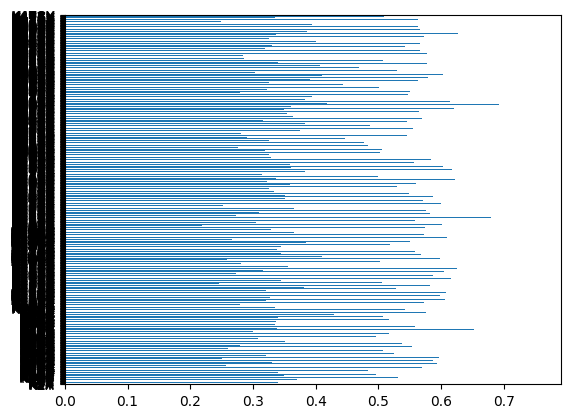

In [40]:
X_new = mutual_info_classif(X, Y)

# Ajusta las etiquetas de las columnas para que coincidan con las dimensiones de X
feat_imp = pd.Series(X_new, df.columns[1:len(df.columns)-1])

# Graficar la importancia de las características
feat_imp.plot(kind='barh')
plt.show()

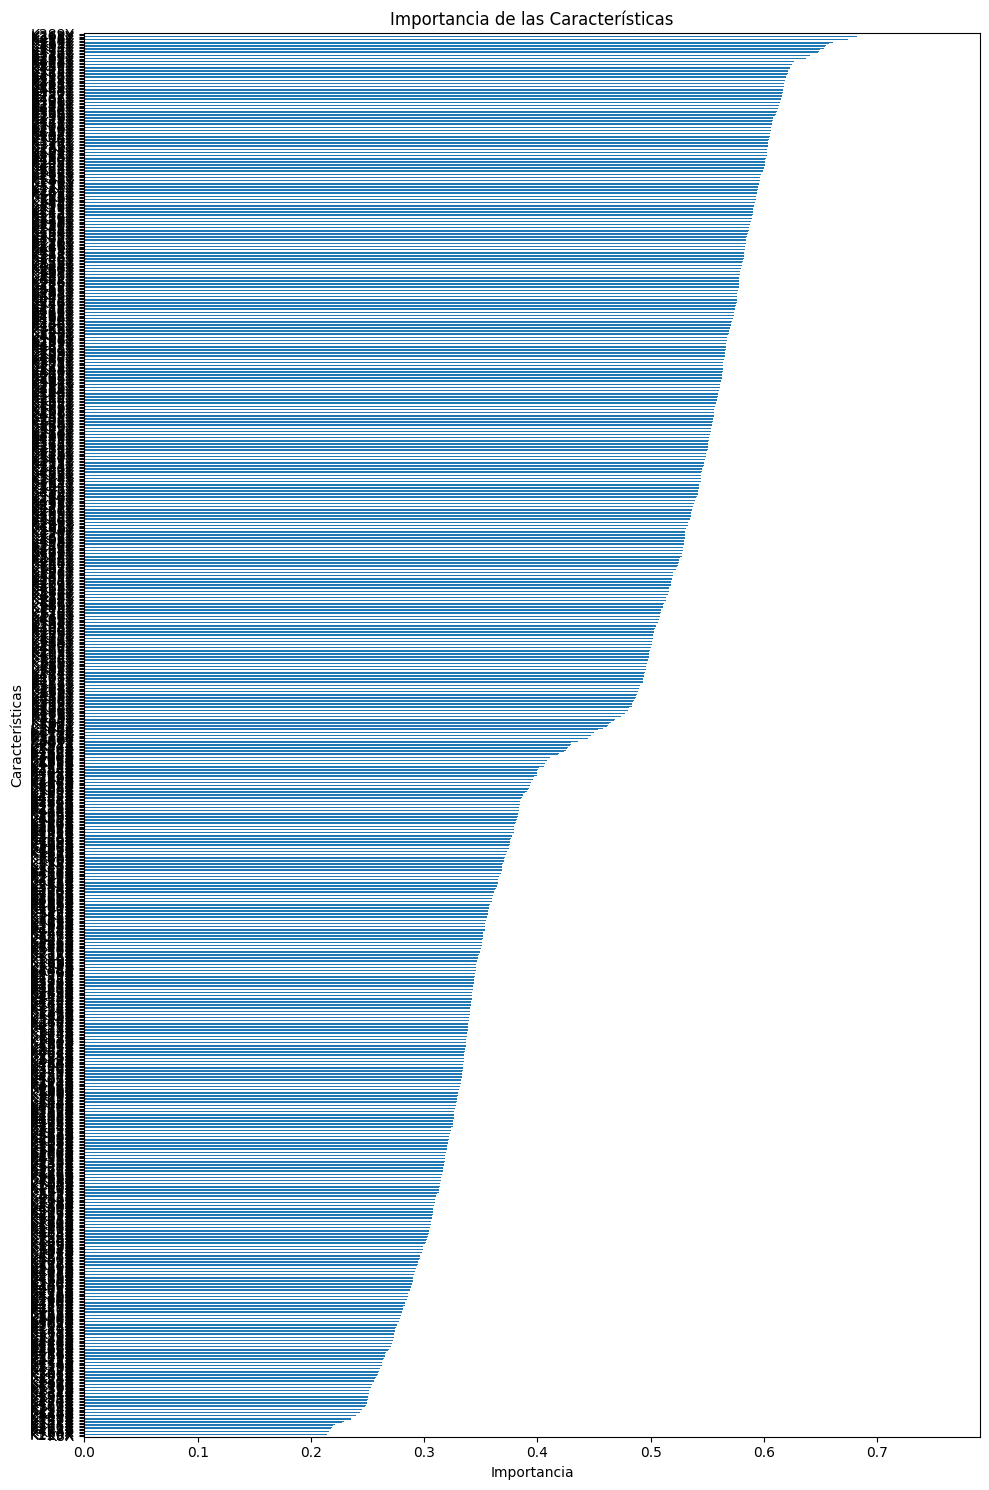

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Suponiendo que X y Y ya están definidos y son tu conjunto de datos y etiquetas, respectivamente
X_new = mutual_info_classif(X, Y)

# Ajusta las etiquetas de las columnas para que coincidan con las dimensiones de X
feat_imp = pd.Series(X_new, df.columns[1:len(df.columns)-1])

# Ordena las características por importancia y grafica
feat_imp_sorted = feat_imp.sort_values()

# Graficar la importancia de las características
plt.figure(figsize=(10, 15))  # Ajusta el tamaño según sea necesario
feat_imp_sorted.plot(kind='barh')

# Rotar las etiquetas
plt.gca().tick_params(axis='y', labelrotation=0)  # Cambia a 45 o 90 si es necesario

# Mejora la legibilidad del gráfico
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.tight_layout()  # Asegura que todo encaje sin superponerse

plt.show()


In [45]:
# Calcular el valor medio entre 0.2 y 0.3
umbral = (0.4 + 0.5) / 2

# Filtrar las características con valores mayores al umbral
selected_features = df.columns[np.where(X_new > umbral)].tolist()

# Mostrar las características seleccionadas
print("Características seleccionadas con valor mayor a", umbral, ":", selected_features)
features_df_info_gain = df[["Image"] + selected_features]
features_df_info_gain

Características seleccionadas con valor mayor a 0.45 : ['K1X', 'K2X', 'K3X', 'K4X', 'K5X', 'K6X', 'K7X', 'K8X', 'K9X', 'K10X', 'K11X', 'K12X', 'K13X', 'K14X', 'K15X', 'K17X', 'K18X', 'K19X', 'K20X', 'K21X', 'K22X', 'K23X', 'K24X', 'K25X', 'K26X', 'K27X', 'K28X', 'K29X', 'K30X', 'K31X', 'K32X', 'K33X', 'K34X', 'K35X', 'K36X', 'K37X', 'K38X', 'K39X', 'K40X', 'K41X', 'K42X', 'K43X', 'K44X', 'K45X', 'K46X', 'K47X', 'K48X', 'K49X', 'K50X', 'K51X', 'K52X', 'K53X', 'K54X', 'K55X', 'K56X', 'K57X', 'K58X', 'K58Y', 'K59X', 'K60X', 'K61X', 'K62X', 'K63X', 'K64X', 'K65X', 'K66X', 'K67X', 'K68X', 'K69X', 'K70X', 'K71X', 'K72X', 'K73X', 'K74X', 'K75X', 'K76X', 'K77X', 'K78X', 'K79X', 'K80X', 'K81X', 'K82X', 'K83X', 'K84X', 'K85X', 'K86X', 'K87X', 'K88X', 'K89X', 'K90X', 'K91X', 'K92X', 'K93X', 'K94X', 'K95X', 'K96X', 'K97X', 'K98X', 'K99X', 'K100X', 'K101X', 'K102X', 'K103X', 'K104X', 'K105X', 'K106X', 'K107X', 'K108X', 'K109X', 'K110X', 'K111X', 'K112X', 'K113X', 'K114X', 'K115X', 'K116X', 'K117X',

,Image,K1X,K2X,K3X,K4X,K5X,K6X,K7X,K8X,K9X,...,K469X,K470X,K471X,K472X,K473X,K474X,K475X,K476X,K477X,K478X
0,SUJETO10_ENOJO_segmentado_frame0.jpg,0.516717,0.525122,0.522194,0.520307,0.527029,0.528918,0.533020,0.452462,0.535847,...,0.470921,0.482739,0.472407,0.459043,0.469388,0.586153,0.597166,0.587159,0.575269,0.585243
1,SUJETO10_ENOJO_segmentado_frame120.jpg,0.522165,0.534889,0.530828,0.530545,0.537171,0.539290,0.543733,0.461720,0.547566,...,0.481572,0.493419,0.483559,0.469564,0.479480,0.594279,0.605121,0.595619,0.583513,0.593000
2,SUJETO10_ENOJO_segmentado_frame150.jpg,0.521257,0.532735,0.528710,0.528189,0.534973,0.536958,0.540957,0.460520,0.544457,...,0.479952,0.491748,0.481892,0.467997,0.477911,0.593558,0.604407,0.594810,0.582683,0.592320
3,SUJETO10_ENOJO_segmentado_frame180.jpg,0.519951,0.532665,0.528782,0.527933,0.534852,0.536787,0.540639,0.457588,0.544010,...,0.477036,0.488321,0.478554,0.465583,0.475401,0.592393,0.602347,0.593610,0.582534,0.591239
4,SUJETO10_ENOJO_segmentado_frame210.jpg,0.522861,0.534696,0.530758,0.530206,0.536961,0.538989,0.543086,0.461393,0.546634,...,0.479272,0.490770,0.480933,0.467618,0.477526,0.594907,0.605531,0.596163,0.584328,0.593704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,SUJETO9_TRISTEZA_segmentado_frame90.jpg,0.466474,0.471724,0.469866,0.465500,0.473138,0.474607,0.477799,0.395992,0.480191,...,0.414909,0.427523,0.415741,0.402286,0.414082,0.539010,0.550433,0.540197,0.527597,0.537758
469,SUJETOBASELINE_ENOJO_.jpg,0.560945,0.530364,0.533198,0.518769,0.530013,0.530284,0.532248,0.443318,0.531075,...,0.486411,0.499561,0.485943,0.472768,0.486684,0.620430,0.632946,0.623366,0.607285,0.617144
470,SUJETOBASELINE_FELICIDAD_.jpg,0.540443,0.544350,0.542824,0.534408,0.545698,0.547400,0.551285,0.433408,0.554233,...,0.461956,0.477953,0.462953,0.445771,0.460922,0.636306,0.653438,0.637066,0.619192,0.635599
471,SUJETOBASELINE_NEUTRAL_.jpg,0.523542,0.524195,0.523063,0.514287,0.525274,0.526843,0.530797,0.413220,0.532972,...,0.443472,0.460032,0.443466,0.426757,0.443453,0.619772,0.636259,0.621623,0.603425,0.617948


## Modelos a Evaluar

## Evaluando los modelos

## Seleccionando el mejor modelo

## Validaci&oacute;n

## Conclusiones